In [1]:
import urllib
import json
import vis3DConnect as vc

# NOTE
These are in single micron. So you need to divide by 25 if you are trying to fit it into 25 micron voxel space. 


In [2]:
#http://connectivity.brain-map.org/?searchMode=spatial&sourceDomain=8,304325711&primaryStructureOnly=true&isi=false&targetCoordinates=9400,1250,6200&initImage=TWO_PHOTON&experimentCoordinates=9400,1250,6200&experiment=309113907

target_voxel = [9400,1250,6200]
experiment_id = 309113907

In [3]:

def get_path( target_voxel, experiment_id ) :
    
    url = "http://api.brain-map.org/api/v2/data/query.json?criteria=service::mouse_connectivity_target_spatial"
    url = url + "[seed_point$eq%s]" % ','.join([str(s) for s in target_voxel])
    url = url + "[section_data_set$eq%d]" % experiment_id
    
    response = urllib.urlopen(url)
    data = json.loads(response.read())
    data = [s['coord'] for s in data['msg'][0]['path']]
    return data
    

In [4]:
target_voxel = [9400,1250,6200]
experiment_id = 309113907
data = get_path( target_voxel, experiment_id )

# target voxel is starting point ending at the injection site

In [29]:
# unpack it for plotting
x, y, z = zip(*data)


In [30]:
# unpack it for plotting
x, y, z = zip(*data)

import numpy as np
# divide by 25 
nx = np.array(x).astype(float)/25
ny = np.array(y).astype(float)/25
nz = np.array(z).astype(float)/25



In [48]:
tst = np.vstack([nx,ny,nz]).transpose()
print tst
print len(tst)
print 'break'
print tst[0:len(tst):6,:]
print 'break'
print tst[::6]

[[ 376.     52.    248.  ]
 [ 375.52   55.52  248.  ]
 [ 374.2    58.64  248.  ]
 [ 371.52   60.88  248.44]
 [ 368.     62.64  249.32]
 [ 364.     63.52  250.64]
 [ 360.44   64.    252.  ]
 [ 357.32   64.    253.76]
 [ 354.64   64.44  256.  ]
 [ 352.     65.76  258.2 ]
 [ 349.32   68.44  260.  ]
 [ 347.08   71.52  261.32]
 [ 344.88   74.64  262.64]
 [ 342.64   77.32  263.52]
 [ 340.     80.44  264.  ]
 [ 337.76   83.52  264.  ]
 [ 336.     86.64  264.44]
 [ 334.64   89.32  265.32]
 [ 332.88   92.44  266.64]
 [ 331.08   96.    267.52]
 [ 328.88   99.52  268.  ]
 [ 326.64  102.64  268.44]
 [ 324.    104.88  269.76]
 [ 321.76  107.08  272.44]
 [ 320.    108.88  275.52]
 [ 318.2   110.64  278.64]
 [ 316.    111.52  280.88]
 [ 313.32  112.44  283.08]
 [ 311.08  113.76  284.88]
 [ 309.32  116.    287.08]
 [ 308.    118.2   289.32]
 [ 306.64  119.52  292.44]
 [ 305.32  120.44  296.  ]
 [ 304.    121.76  299.52]
 [ 302.64  124.    302.64]
 [ 300.88  126.2   305.32]
 [ 298.64  127.52  308.  ]
 

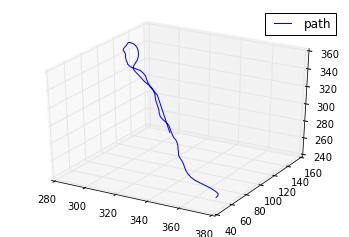

In [31]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(nx, ny, nz, label='path')
ax.legend()
plt.show()

    